# Classification


# Overview

**Classification** is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. 
The process starts with predicting the class of given data points.The classes are often referred to as target, label or categories.
The classification predictive modelling is the task of approximating the mapping function from input variables to discrete output variables. 
The main goal is to identify which class/category the new data will fall into.

**Textual Data : Is inherently discrete, sparse and High Dimensional in nature.**

**Text classification** also known as text tagging or text categorization is the process of categorizing text into organized groups.
By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

**Example: Fake & Real news Dataset**
   
The dataset  can be downloaded from :
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset  

# Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before")
warnings.filterwarnings("ignore", message="UndefinedMetricWarning")


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss

true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

# Reading Data

In [2]:
fake['target'] = 'fake'
true['target'] = 'true'
news = pd.concat([fake, true]).reset_index(drop = True)
print('The size of dataset',news.shape)

The size of dataset (44898, 5)


In [3]:
news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [4]:
news.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


# Logistic Regression Classifier

In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.
It is used to model the probability of a certain class or event existing 
such as pass/fail, win/lose, alive/dead or healthy/sick.

In [5]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.76%


In [6]:
print(confusion_matrix(y_test, prediction))

[[4674   66]
 [  45 4195]]


In [7]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4740
        true       0.98      0.99      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Support Vector Classifier

The support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. 
New points are then added to space by predicting which category they fall into and which space they will belong to.

More often text classification use cases will have linearly separable data and LinearSVC is apt for such scenarios

In [8]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [9]:
print(confusion_matrix(y_test, prediction))

[[4720   20]
 [  20 4220]]


In [10]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4740
        true       1.00      1.00      1.00      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multinomial Naive Bayes Classifier

It is based on Bayes’s theorem which gives an assumption of independence among predictors. 
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

In [11]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.56%


In [12]:
print(confusion_matrix(y_test, prediction))

[[4486  254]
 [ 324 3916]]


In [13]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.93      0.95      0.94      4740
        true       0.94      0.92      0.93      4240

    accuracy                           0.94      8980
   macro avg       0.94      0.93      0.94      8980
weighted avg       0.94      0.94      0.94      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Bernoulli Naive Bayes Classifier

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input

In [14]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.14%


In [15]:
print(confusion_matrix(y_test, prediction))

[[4377  363]
 [ 163 4077]]


In [16]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.96      0.92      0.94      4740
        true       0.92      0.96      0.94      4240

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Gradient Boost Classifier

GB builds an additive model in a forward stage-wise fashion
It allows for the optimization of arbitrary differentiable loss functions. 
Binary classification is a special case where only a single regression tree is induced.

In [17]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.52%


In [18]:
print(confusion_matrix(y_test, prediction))

[[4707   33]
 [  10 4230]]


In [19]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4740
        true       0.99      1.00      0.99      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
Rather than training all the models in isolation of one another, boosting trains models in succession
with each new model being trained to correct the errors made by the previous ones

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes.
We should use this algorithm when we require fast and accurate predictions after the model is deployed


In [20]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   verbosity=0,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.52%


In [21]:
print(confusion_matrix(y_test, prediction))

[[4707   33]
 [  10 4230]]


In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4740
        true       0.99      1.00      0.99      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Stochastic Gradient Descent

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. 
Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.


In [23]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.09%


In [24]:
print(confusion_matrix(y_test, prediction))

[[4693   47]
 [  35 4205]]


In [25]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4740
        true       0.99      0.99      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Decision Tree

he decision tree algorithm builds the classification model in the form of a tree structure. 
It utilizes the if-then rules which are equally exhaustive and mutually exclusive in classification.

We can use decision tree when there are missing values in the data and when pre processing time is to be reduced as it does not require pre processing

In [26]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [27]:
print(confusion_matrix(y_test, prediction))

[[4722   18]
 [  22 4218]]


In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4740
        true       1.00      0.99      1.00      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Random Forest Classifier

Random forest are an **ensemble learning method**.
It operates by **constructing a multitude of decision trees** at training time and outputs the class that is the mode of the classes of the individual trees.
A random forest is **a meta-estimator that fits a number of trees on various subsamples of data sets** and then uses an average to improve the accuracy in the model’s predictive nature.
The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain.

In [29]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.81%


In [30]:
print(confusion_matrix(y_test, prediction))

[[4695   45]
 [  62 4178]]


In [31]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4740
        true       0.99      0.99      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# KNN Classifier

It is **a lazy learning algorithm** that stores all instances corresponding to training data in n-dimensional space
To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors

We should use KNN when the dataset is small and speed is a priority (real-time)


In [32]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 67.59%


In [33]:
print(confusion_matrix(y_test, prediction))

[[4695   45]
 [2865 1375]]


In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.62      0.99      0.76      4740
        true       0.97      0.32      0.49      4240

    accuracy                           0.68      8980
   macro avg       0.79      0.66      0.62      8980
weighted avg       0.79      0.68      0.63      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Classifiers Report

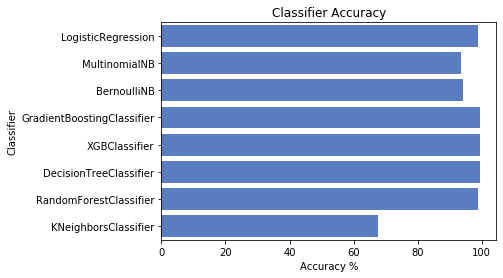

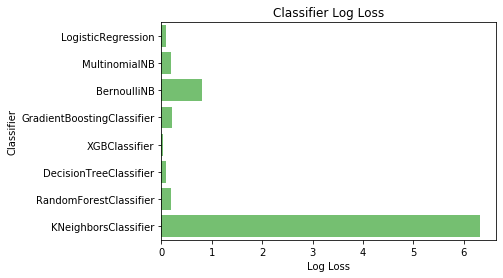

In [35]:
classifiers = [ LogisticRegression(),
                MultinomialNB(),
                BernoulliNB(),
                GradientBoostingClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020),
                XGBClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020,verbosity=0),
                DecisionTreeClassifier(criterion= 'entropy',max_depth = 10,splitter='best', random_state=2020),
                RandomForestClassifier(),
                KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute')
              ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    pipe = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', clf)])
    pipe.fit(x_train,y_train)
    name = clf.__class__.__name__ 
    
    #Accuracy
    train_predictions = pipe.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    
    #Log Loss
    train_predictions = pipe.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

    
    
#Visualization 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()    

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Now let us see an example for multiclass classification using the different algorithms

We first import the dataset for multiclass classification. We will be using the fruit dataset for classification of fruits on the basis of the features such as mass, height, etc that can be seen in the dataframe below.

Dataser Link: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt


In [36]:
fruits = pd.read_csv('fruit.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


We have 59 pieces of fruits, 7 features in the dataset and 4 types of fruits in the dataset:

In [37]:
fruits.shape

(59, 7)

In [38]:
print(fruits.fruit_name.unique())

['apple' 'mandarin' 'orange' 'lemon']


In [39]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


## Create Training and Test Sets and Apply Scaling

In [40]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multiclass Logistic Regression


Multinomial logistic regression is used when the dependent variable in question is nominal (equivalently categorical, meaning that it falls into any one of a set of categories that cannot be ordered in any meaningful way) and for which there are more than two categories.

Multinomial logistic regression is known by a variety of other names, including polytomous LR,[2][3] multiclass LR, softmax regression, multinomial logit (mlogit), the maximum entropy (MaxEnt) classifier

In [41]:
LogReg = LogisticRegression()
model = LogReg.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 46.67%


In [42]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [6 0 1 1]
 [0 0 0 2]]


In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         1
           3       1.00      0.12      0.22         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.51      0.53      0.39        15
weighted avg       0.72      0.47      0.37        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(model.intercept_)
print(model.coef_)

[ 0.08278217  0.18575457 -0.84069224  0.57215549]
[[ 0.02305093  1.42003984 -0.45378509  0.24501545]
 [-0.72149447 -0.84325007 -1.4654268   0.25798641]
 [ 0.99894047  0.90013732  0.25421165  0.42918773]
 [-0.30049693 -1.47692709  1.66500023 -0.93218959]]


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Support Vector Classifier for Multiclass classification

LinearSVC implement the “one-versus-one” approach for multi-class classification.
In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 


In [45]:
svm = LinearSVC()
model = svm.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 46.67%


In [46]:
print(confusion_matrix(y_test, prediction))

[[3 0 1 0]
 [0 1 0 0]
 [6 0 1 1]
 [0 0 0 2]]


In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.33      0.75      0.46         4
           2       1.00      1.00      1.00         1
           3       0.50      0.12      0.20         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.62      0.72      0.62        15
weighted avg       0.51      0.47      0.40        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multinomial Naive Bayes Classifier for multiclass classification

It is based on Bayes’s theorem which gives an assumption of independence among predictors. 
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

In [48]:
MNB = MultinomialNB()
model = MNB.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 40.0%


In [49]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [8 0 0 0]
 [0 0 0 2]]


In [50]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.31      1.00      0.47         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       1.00      1.00      1.00         2

    accuracy                           0.40        15
   macro avg       0.33      0.50      0.37        15
weighted avg       0.22      0.40      0.26        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Bernoulli Naive Bayes Classifier for multiclass classification

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input

In [51]:
BNB = BernoulliNB()
model = BNB.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 26.67%


In [52]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [8 0 0 0]
 [2 0 0 0]]


In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.27      1.00      0.42         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.27        15
   macro avg       0.07      0.25      0.11        15
weighted avg       0.07      0.27      0.11        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Gaussian Naive Bayes Classifier for multiclass classfication

GaussianNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Gaussian distributions; 
i.e., there may be multiple features but each one is assumed to be a binary-valued (Gaussian, boolean) variable.
Therefore, this class requires samples to be represented as binary-valued feature vectors; 
if handed any other kind of data, a GaussianNB instance may binarize its input

In [54]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 66.67%


In [55]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]


In [56]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Decision Tree Classifier for multiclass classfication

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split.

In [57]:
dt = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020)
model = dt.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 73.33%


In [58]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [1 0 0 1]]


In [59]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.50      0.50      0.50         2

    accuracy                           0.73        15
   macro avg       0.77      0.78      0.75        15
weighted avg       0.82      0.73      0.74        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Random Forest Classifier for multiple classes

Random forest are an ensemble learning method. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes of the individual trees. A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature. The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain

In [60]:
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 80.0%


In [61]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [0 0 0 2]]


In [62]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.67      1.00      0.80         2

    accuracy                           0.80        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.87      0.80      0.80        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Gradient Boosting Classifier for multiclass classificaton

GB builds an additive model in a forward stage-wise fashion It allows for the optimization of arbitrary differentiable loss functions. Binary classification is a special case where only a single regression tree is induced.

In [63]:
gbc = GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55)

model = gbc.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 53.33%


In [64]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [1 0 0 0]
 [4 0 3 1]
 [1 0 0 1]]


In [65]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.40      1.00      0.57         4
           2       0.00      0.00      0.00         1
           3       1.00      0.38      0.55         8
           4       0.50      0.50      0.50         2

    accuracy                           0.53        15
   macro avg       0.47      0.47      0.40        15
weighted avg       0.71      0.53      0.51        15



C:\Users\raghuram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# XGBoost Classifier for multiclass classification

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Rather than training all the models in isolation of one another, boosting trains models in succession with each new model being trained to correct the errors made by the previous ones

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes. We should use this algorithm when we require fast and accurate predictions after the model is deployed

In [66]:
xgb = XGBClassifier(loss = 'deviance',
                                learning_rate = 0.01,
                                n_estimators = 10,
                                max_depth = 5,
                                verbosity=0,
                                random_state=2020)

model = xgb.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 66.67%


In [67]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]


In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Stochastic Gradient Descent for multiclass classification

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

In [69]:
sdg = SGDClassifier()
model = sdg.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 40.0%


In [70]:
print(confusion_matrix(y_test, prediction))

[[1 0 2 1]
 [0 1 0 0]
 [4 0 2 2]
 [0 0 0 2]]


In [71]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.20      0.25      0.22         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.40      1.00      0.57         2

    accuracy                           0.40        15
   macro avg       0.53      0.62      0.53        15
weighted avg       0.44      0.40      0.38        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# KNN Classifier for multiclass classification

It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors

We should use KNN when the dataset is small and speed is a priority (real-time)

In [72]:
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 100.0%


In [73]:
print(confusion_matrix(y_test, prediction))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]


In [74]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Classifiers Report (multiclass classification)

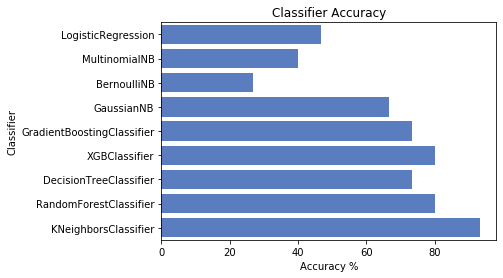

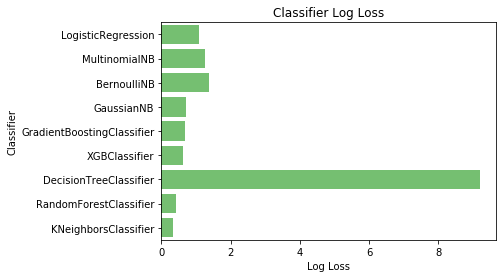

In [75]:
import matplotlib.pyplot as plt
classifiers = [ LogisticRegression(),
                MultinomialNB(),
                BernoulliNB(),
                GaussianNB(),
                GradientBoostingClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020),
                XGBClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020,verbosity=0),
                DecisionTreeClassifier(criterion= 'entropy',max_depth = 10,splitter='best', random_state=2020),
                RandomForestClassifier(),
                KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute')
              ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    model = clf
    model.fit(X_train,y_train)
    name = clf.__class__.__name__ 
    
    #Accuracy
    train_predictions = model.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    #Log Loss
    train_predictions = model.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

    
    
#Visualization 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()    

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Hyperparameter Tuning

# Grid Search
Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

It is important to note that Grid-searching can be extremely computationally expensive and may take your machine quite a long time to run. Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination.

**Note:** Here Grid search is demonstrated for only one model but it can be replicated across all the model with changing its respective hyperparameters


**Cross Validation**<br>
The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. When we approach a machine learning problem, we make sure to split our data into a training and a testing set. In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.


![CV.PNG](CV.PNG)

For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. This sounds like an awfully tedious process! Each time we want to assess a different set of hyperparameters, we have to split our training data into K fold and train and evaluate K times. If we have 10 sets of hyperparameters and are using 5-Fold CV, that represents 50 training loops.

In [76]:
# fruits = pd.read_csv(r'/fruit.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [77]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [79]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based 
# parameter value can be used according to data understanding 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100,500, 1000]
}

In [80]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.2min finished


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Random Search Cross Validation
Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter

In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 6, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 55, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()


# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations(n_iter), and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [83]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Bayesian Optimization
A popular alternative to tune the model hyperparameters is Bayesian Optimization. Bayesian Optimization is **a probabilistic model-based technique used to find minimum of any function**. This approach can yield better performance on the test set while it requires fewer iterations than random search.<br><br> It **takes into account past evaluations** when choosing the optimal set of hyperparameters. Thus it chooses its parameter combinations in an informed way. In doing so, it focus on those parameters that yield the best possible scores. Thus, this technique **requires less number of iterations** to find the optimal set of parameter values. It ignores those areas of the parameter space that are useless. Hence, it is less time-consuming and not frustrating at all.

Bayesian optimization is also called **Sequential Model-Based Optimization (SMBO)**. It finds the value that minimizes an objective function by building a surrogate function. A **surrogate function** is nothing but a probability model based on past evaluation results of the objective. In the surrogate function, the input values to be evaluated are selected based on the criteria of expected improvement. Bayesian methods use past evaluation results to choose the next input values. So, this method excludes the poor input values and limit the evaluation of the objective function by choosing the next input values which have done well in the past.

There are a number of Python libraries that enable us to implement Bayesian Optimization for machine learning models. The examples of libraries are **Spearmint, Hyperopt or SMAC**. Scikit-learn also provides a library named Scikit-optimize for Bayesian optimization.

Bayesian Optimization methods differ in how they construct the surrogate function. Spearmint uses Gaussian Process surrogate while SMAC uses Random Forest Regression. Hyperopt uses the Tree Parzen Estimator (TPE) for optimization.

# Bayesian optimization using hyperopt

##  Objective function
The aim is to **minimize the objective function**. It takes in a set of values as input (in this case hyperparameters of GBM model) and outputs a real value to minimize - the cross validation loss.

We will write the objective function for the GBM model with 5-fold cross validation.

In the objective-function, cross-validation is done. Once the cross validation is complete, we get the mean score. We want a value to minimize. So, we take negative of score. This value is then returned as the loss key in the return dictionary.

The objective function returns a dictionary of values - loss and status.

Next, we define the domain space.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


##  Domain space
The domain space is the **range of values that we want to evaluate for each hyperparameter**.In each iteration of the search, the Bayesian optimization algorithm will choose one value for each hyperparameter from the domain space. In Bayesian optimization this space has probability distributions for each hyperparameter value rather than discrete values. When first tuning a model, we should create a wide domain space centered around the default values and then refine it in subsequent searches.


## Optimization algorithm
Writing the optimization algorithm in hyperopt is very simple. It just involves a single line of code. We should use the Tree Parzen Estimator (tpe). The best parameter using Hyperopt for DT is shown below:

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, Trials, tpe, STATUS_OK

data = pd.read_csv(r'fruit.csv')
X = data[['mass', 'width', 'height', 'color_score']]
y = data.fruit_label
def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X, y).mean()
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
#     'scale': hp.choice('scale', [0, 1]),
#     'normalize': hp.choice('normalize', [0, 1])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:', best)
# print best

100%|█████████████████████████████████████████████| 300/300 [00:09<00:00, 30.68trial/s, best loss: -0.9333333333333332]
best: {'criterion': 0, 'max_depth': 6, 'max_features': 2}


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Bayesian Optimization using Skopt

In [85]:
# example of bayesian optimization with scikit-optimize
!pip install scikit-optimize
import pandas as pd
from numpy import mean
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="The least populated class")

#import dataset
data = pd.read_csv(r'fruit.csv')
data = data.dropna()
X = data[['mass', 'width', 'height', 'color_score']]
y = data.fruit_label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the model
model = KNeighborsClassifier()
# define the space of hyperparameters to search
search_space = [Integer(1, 5, name='n_neighbors'), Integer(1, 2, name='p')]

# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # something
    model.set_params(**params)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = mean(result)
    return 1.0 - estimate

# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

Best Accuracy: 0.703
Best Parameters: n_neighbors=3, p=1


In [86]:
print("""Best parameters:
- n_neighbors=%d
- p=%d""" % (result.x[0], result.x[1]))

Best parameters:
- n_neighbors=3
- p=1


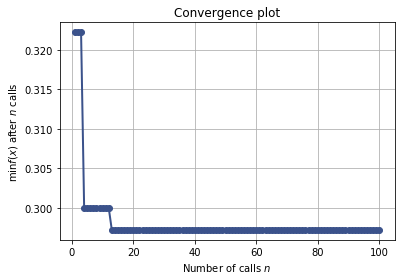

In [87]:
from skopt.plots import plot_convergence

plot_convergence(result)

# Multilabel Classification
Multi-label classification originated from the investigation of text categorisation problem, where **each document may belong to several predefined topics simultaneously**.
Multi-label classification of textual data is an important problem. Examples range from news articles to emails. For instance, this can be employed to find the genres that a movie belongs to, based on the summary of its plot.
Or multi-label classification of genres based on movie posters. (This enters the realm of computer vision.)<br><br>
In multi-label classification, the **training set is composed of instances each associated with a set of labels**, and the task is to predict the label sets of unseen instances through analyzing training instances with known label sets.<br><br>
**Difference between multi-class classification & multi-label classification** is that in multi-class problems the classes are mutually exclusive, whereas for multi-label problems each label represents a different classification task, but the tasks are somehow related.
For example, multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time. Whereas, an instance of multi-label classification can be that a text might be about any of religion, politics, finance or education at the same time or none of these.


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Problem Definition:
Toxic comment classification is a multi-label text classification problem with a highly imbalanced dataset.
We’re challenged to build a multi-labeld model that’s capable of detecting different types of toxicity like threats, obscenity, insults, and identity-based hate. We need to create a model which predicts a probability of each type of toxicity for each comment. The download link for the datset is: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

First let us import the necessary libraries.

In [88]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we load the data from csv files into a pandas dataframe and check its attributes.

In [89]:
data_path = "train.csv"
data_raw = pd.read_csv(data_path)
data_raw = data_raw.head(1000)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 1000
Number of columns in data = 8


**Sample data:**


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


Now we count the number of comments under each label.

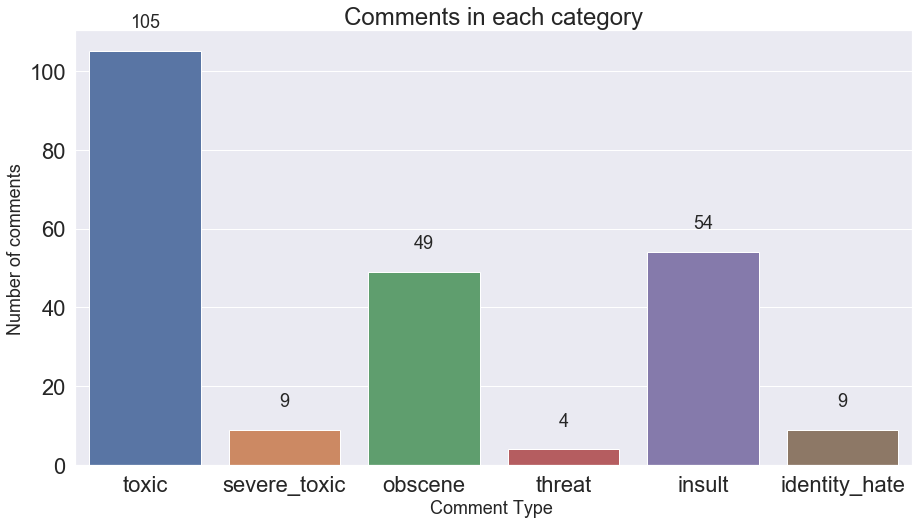

In [90]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

Counting the number of comments having multiple labels.

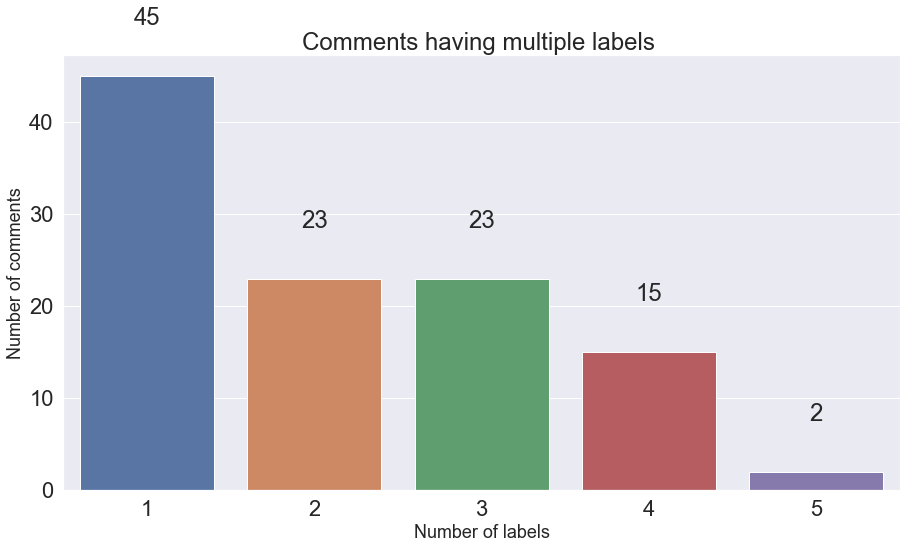

In [91]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


WordCloud representation of most used words in each category of comments.

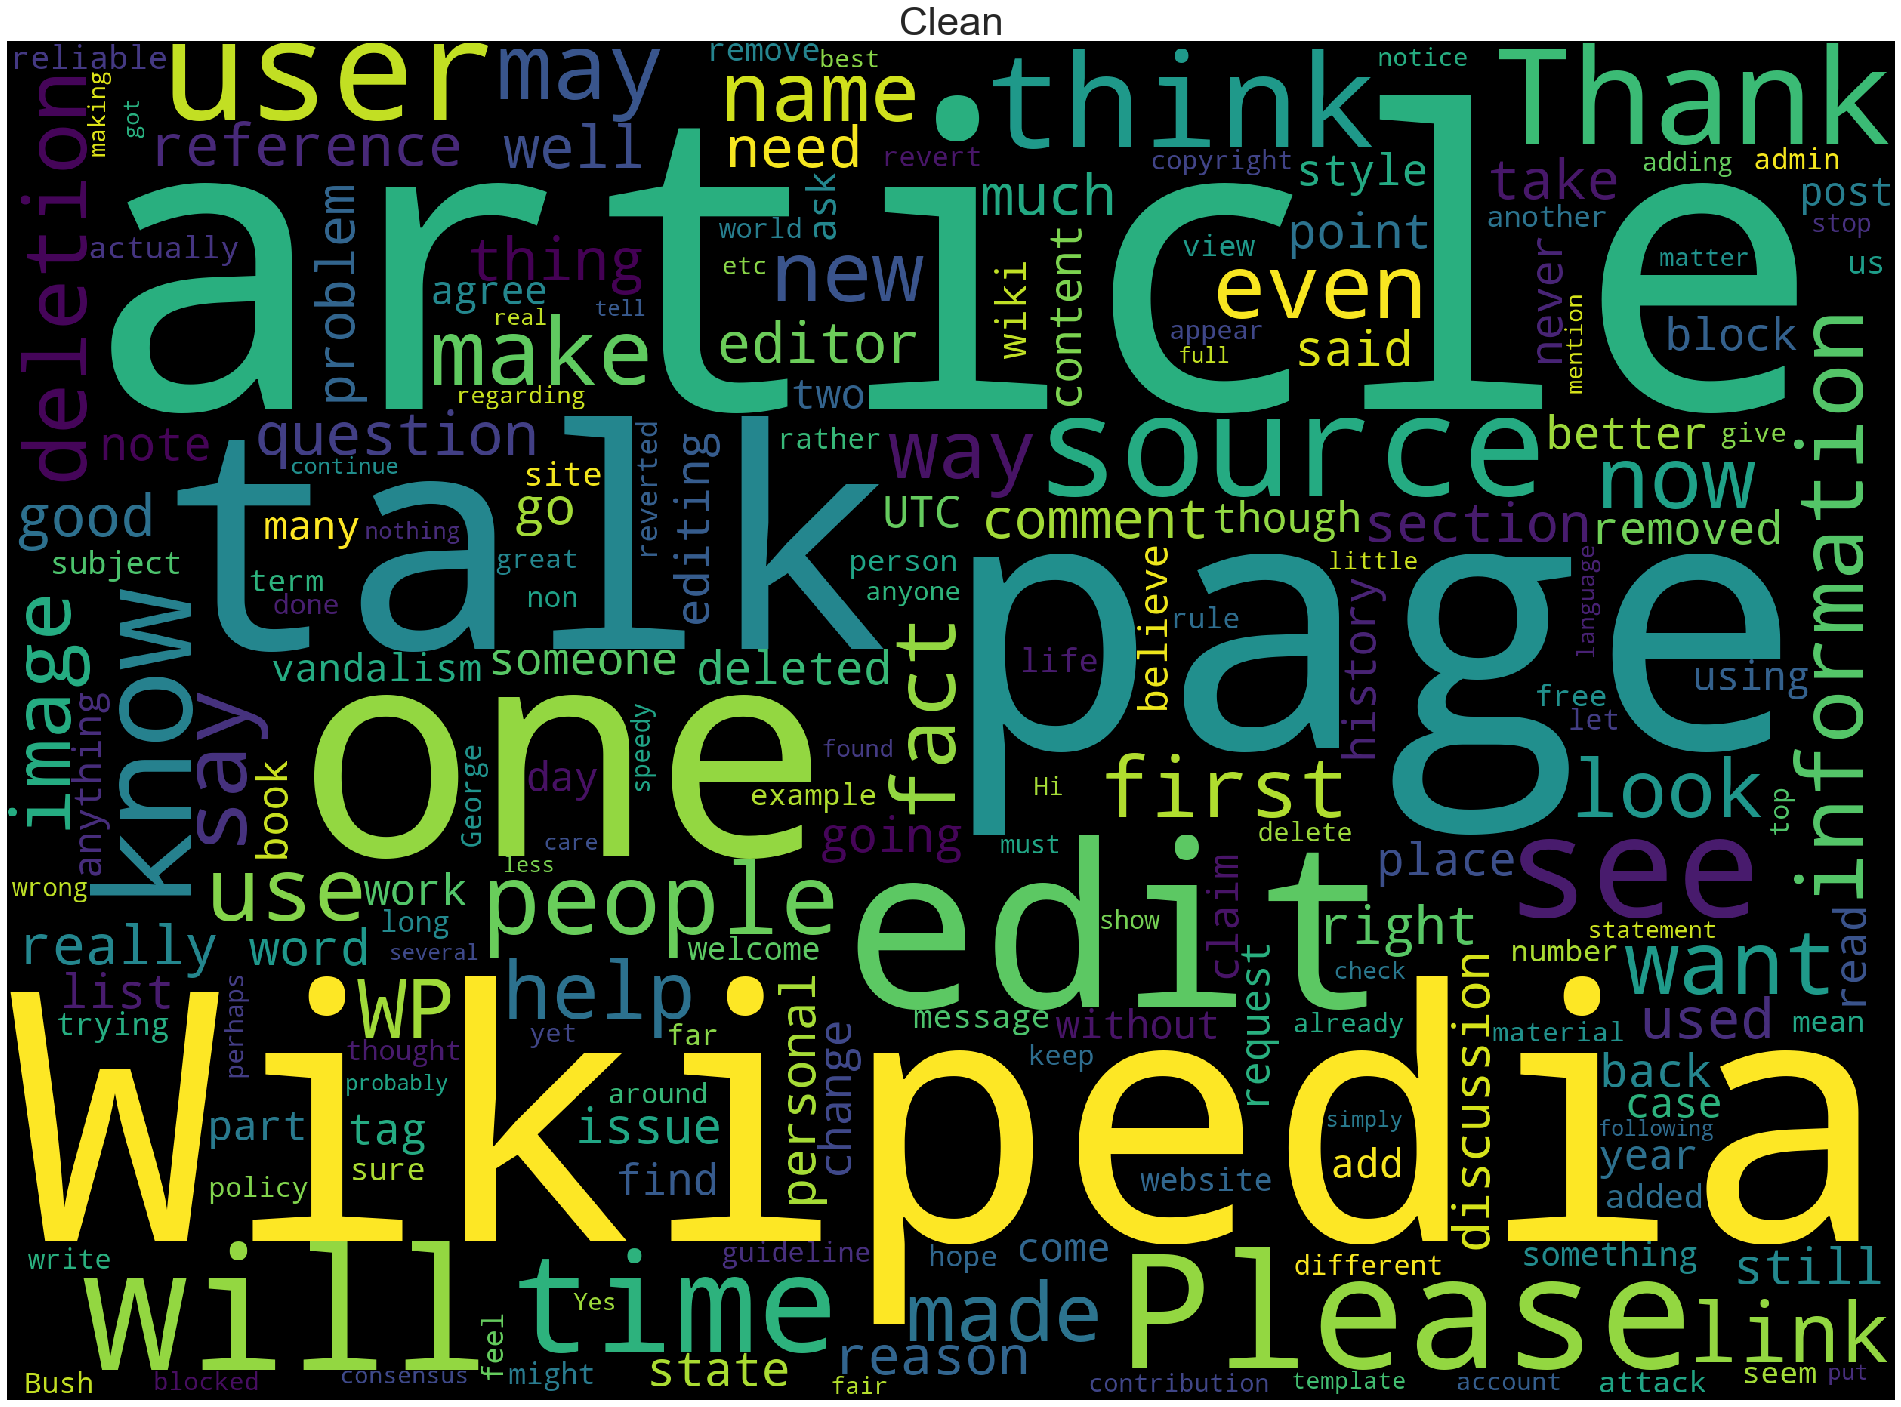

In [92]:
# !pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
text = data_raw.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
# Same code can be used to generate wordclouds of other categories.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Data Preprocessing
We first convert the comments to lower-case and then use custom made functions to remove html-tags, punctuation and non-alphabetic characters from the comments.

In [93]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = data_raw
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)

Next we **remove all the stop-words** present in the comments using the default set of stop-words that can be downloaded from NLTK library. We also add few stop-words to the standard list.<br><br>
Stop words are basically a set of commonly used words in any language, not just English. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

In [94]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['comment_text'] = data['comment_text'].apply(removeStopWords)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


Next we do **stemming**. There exist different kinds of stemming which basically transform words with roughly the same semantics to one standard form. For example, for amusing, amusement, and amused, the stem would be amus.

In [95]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['comment_text'] = data['comment_text'].apply(stemming)

In [96]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0


**After splitting the dataset into train & test sets**, we want to summarize our comments and convert them into numerical vectors.
One technique is to **pick the most frequently occurring terms** (words with high term frequency or tf). **However, the most frequent word is a less useful metric since some words like ‘this’, ‘a’ occur very frequently across all documents**.
Hence, we also **want a measure of how unique a word is** i.e. how infrequently the word occurs across all documents (inverse document frequency or idf).
So, **the product of tf & idf (TF-IDF) of a word gives a product of how frequent this word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents**.
Words in the document with a high tfidf score occur frequently in the document and provide the most information about that specific document.

In [97]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(700, 8)
(300, 8)


In [98]:
train_text = train['comment_text']
test_text = test['comment_text']

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [100]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multi-Label Classification Techniques:
Most traditional learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems, so that the existing single-label algorithms can be used.

## OneVsRest
**Traditional two-class and multi-class problems can both be cast into multi-label ones by restricting each instance to have only one label**. On the other hand, the generality of multi-label problems inevitably makes it more difficult to learn. An intuitive approach to solving multi-label problem is to **decompose it into multiple independent binary classification problems (one per category)**.<br><br>
**In an “one-to-rest” strategy, one could build multiple independent classifiers** and, for an unseen instance, choose the class for which the confidence is maximized.
The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.<br><br>
For instance, it is more like asking simple questions, say, “is the comment toxic or not”, “is the comment threatening or not?”, etc. Also there might be an extensive case of overfitting here, since most of the comments are unlabeled, i,e., most of the comments are clean comments.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [102]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**
Test accuracy is 0.89


**Processing severe_toxic comments...**
Test accuracy is 0.9933333333333333


**Processing obscene comments...**
Test accuracy is 0.9466666666666667


**Processing threat comments...**
Test accuracy is 0.9966666666666667


**Processing insult comments...**
Test accuracy is 0.94


**Processing identity_hate comments...**
Test accuracy is 0.99


Wall time: 367 ms


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Binary Relevance
In this case **an ensemble of single-label binary classifiers is trained, one for each class**. Each classifier predicts either the membership or the non-membership of one class. The **union of all classes that were predicted is taken as the multi-label output**. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.<br><br>
In other words, if there’s q labels, the binary relevance method create q new data sets from the images, one for each label and train single-label classifiers on each new data set. One classifier may answer yes/no to the question “does it contain trees?”, thus the “binary” in “binary relevance”. This is a simple approach but does not work well when there’s dependencies between the labels.<br><br>
OneVsRest & Binary Relevance seem very much alike. If multiple classifiers in OneVsRest answer “yes” then you are back to the binary relevance scenario.

In [103]:

%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8666666666666667


Wall time: 5 s


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Classifier Chains
**A chain of binary classifiers C0, C1, . . . , Cn is constructed**, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.<br.<br>
**The total number of classifiers needed for this approach is equal to the number of classes**, but the training of the classifiers is more involved.
Following is an illustrated example with a classification problem of three categories {C1, C2, C3} chained in that order.

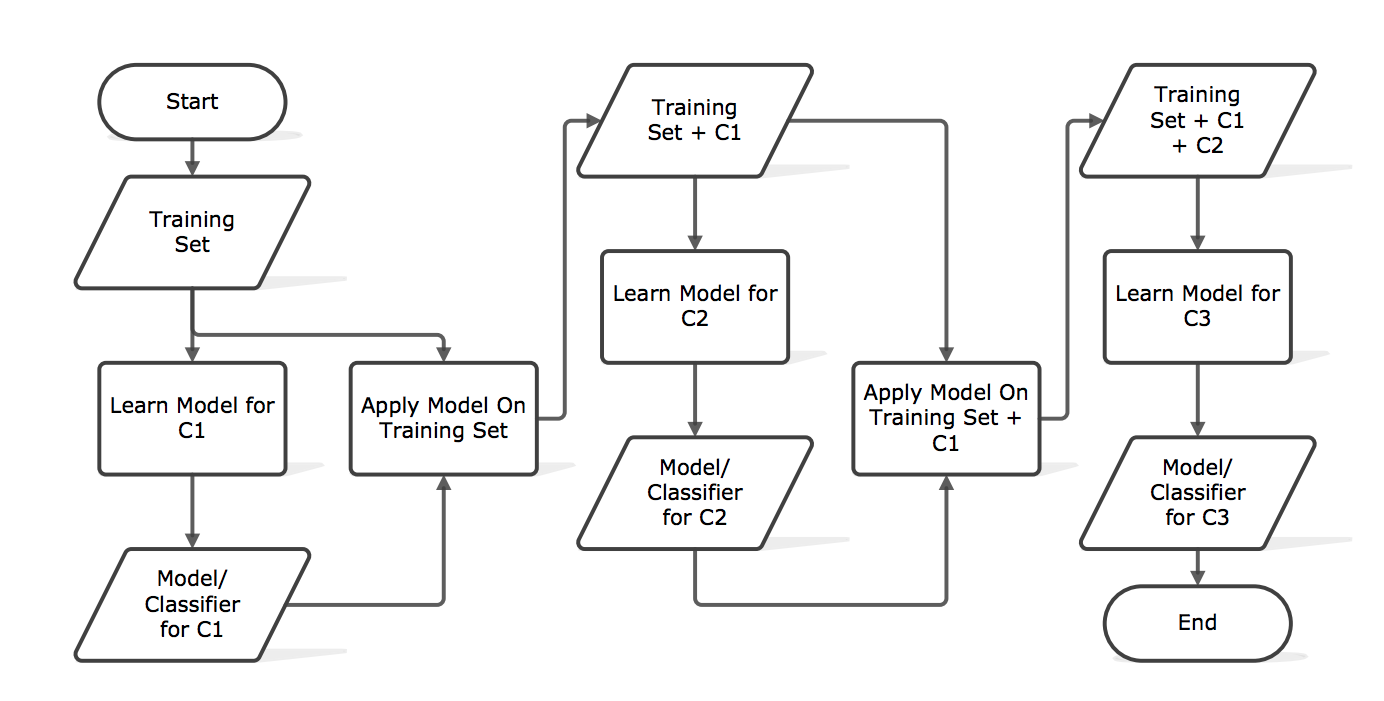

In [104]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [105]:

%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8833333333333333


Wall time: 6.81 s


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Label Powerset
This approach does **take possible correlations between class labels into account**. More commonly this approach is called the label-powerset method, because it considers each member of the power set of labels in the training set as a single label.
This method needs worst case (2^|C|) classifiers, and has a high computational complexity.<br><br>
However **when the number of classes increases the number of distinct label combinations can grow exponentially**. This easily leads to combinatorial explosion and thus computational infeasibility. Furthermore, some label combinations will have very few positive examples.

In [106]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [107]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8833333333333333


Wall time: 5.12 s


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Adapted Algorithm
Algorithm adaptation methods for multi-label classification **concentrate on adapting single-label classification algorithms to the multi-label case** usually by changes in cost/decision functions.<br><br>
Here we use a multi-label lazy learning approach named ML-KNN which is derived from the traditional K-nearest neighbor (KNN) algorithm.<br><br>
The skmultilearn.adapt module implements algorithm adaptation approaches to multi-label classification, including but not limited to ML-KNN.

In [108]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [109]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.8733333333333333


Wall time: 39.6 s


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>
